In [5]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import numpy as np
from keras import layers, optimizers, callbacks, preprocessing
from sklearn.metrics import confusion_matrix


In [6]:
EPOCH = 200

train_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset copy/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle=True,
    subset='training',
)

val_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset copy/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle= True,
    subset='validation',
)


test_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset copy/test',    
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
   batch_size=32, 
    seed=1337,
    image_size=(128, 128),
)

class_names = ['NonDementia', 'VeryMildDementia']
train_data.class_names = class_names
val_data.class_names = class_names

Found 4352 files belonging to 2 classes.
Using 3482 files for training.
Found 4352 files belonging to 2 classes.
Using 870 files for validation.
Found 1088 files belonging to 2 classes.


In [7]:
optimizer = optimizers.Adam(learning_rate=1e-5)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model = keras.models.Sequential()
model.add(layers.Input(shape=(128,128,1)))
#model.add(layers.RandomFlip(mode='horizontal'))
#model.add(layers.RandomZoom(0.05, fill_mode='nearest'))
#model.add(layers.RandomContrast(0.05))
#model.add(layers.RandomTranslation(0.05, 0.05, fill_mode='nearest'))    
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'auc', 'f1_score']
)

history = model.fit(train_data, validation_data=val_data, callbacks=[early_stopping], epochs= EPOCH)
    


Epoch 1/200


2024-05-12 20:21:33.869273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-12 20:21:34.226256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4997 - auc: 0.4962 - f1_score: 0.4675 - loss: 6.8957

2024-05-12 20:21:39.827161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.4998 - auc: 0.4964 - f1_score: 0.4679 - loss: 6.8690 - val_accuracy: 0.6207 - val_auc: 0.6493 - val_f1_score: 0.5083 - val_loss: 0.7825
Epoch 2/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5595 - auc: 0.5776 - f1_score: 0.5481 - loss: 1.5557 - val_accuracy: 0.6414 - val_auc: 0.6991 - val_f1_score: 0.5767 - val_loss: 0.7014
Epoch 3/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5628 - auc: 0.5890 - f1_score: 0.5475 - loss: 1.1081 - val_accuracy: 0.6506 - val_auc: 0.7111 - val_f1_score: 0.6298 - val_loss: 0.6407
Epoch 4/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6195 - auc: 0.6524 - f1_score: 0.6052 - loss: 0.8072 - val_accuracy: 0.6862 - val_auc: 0.7378 - val_f1_score: 0.6587 - val_loss: 0.6081
Epoch 5/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6355 - auc: 0.6907 - f1_score: 0.6199 - loss: 0.7062 - val_accuracy: 0.6678 - val_auc: 0.7373 - val_f1_score: 0.6344 - val_loss:

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6883 - auc: 0.7581 - f1_score: 0.6869 - loss: 1.1347
[1.1123989820480347, 0.6902573704719543, 0.7598910927772522, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7102321, 0.6673247], dtype=float32)>]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

2024-05-12 20:36:54.239015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

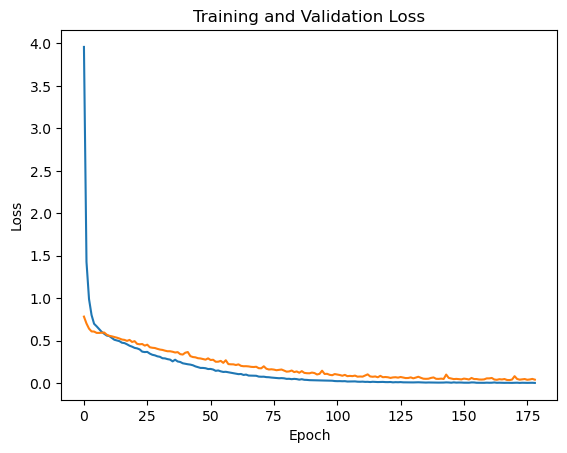

[[413 110]
 [227 338]]


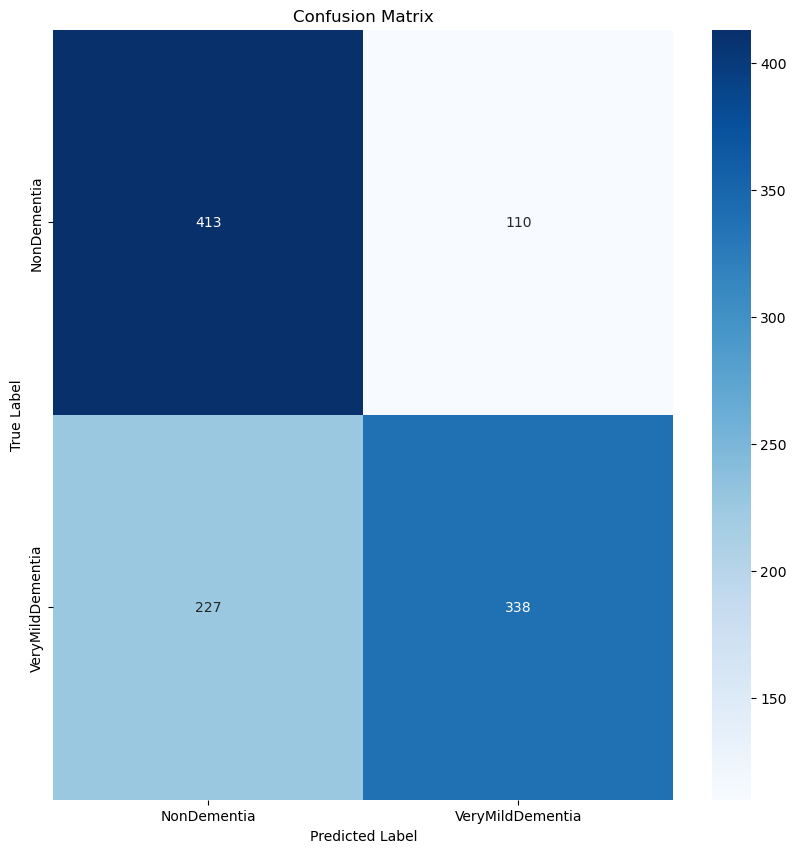

In [8]:
evaluate = model.evaluate(test_data)
print(evaluate)


predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

confusion = confusion_matrix(predictions, labels)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Valadation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()




print(confusion)
plt.figure(figsize=(10,10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()